In [90]:
s3_data ="s3://aegovan-data/test_unique_pub_v3_lessnegatve_predicted_linear.json"
data_dir = "temp"

In [40]:
!rm -rf $data_dir
!mkdir $data_dir
!aws s3 cp s3://aegovan-data/results/model_190317_0311 $data_dir --recursive --exclude "*"  --include "*.json" --exclude "*vocab.json" --include "*.log"

download: s3://aegovan-data/results/model_190317_0311/classes.json to temp/classes.json
download: s3://aegovan-data/results/model_190317_0311/feature_lens.json to temp/feature_lens.json
download: s3://aegovan-data/results/model_190317_0311/training_scores_epoch_Objectdump_20190317_032222_101f1008-d264-4186-8d0b-6aef8eac039d.json to temp/training_scores_epoch_Objectdump_20190317_032222_101f1008-d264-4186-8d0b-6aef8eac039d.json
download: s3://aegovan-data/results/model_190317_0311/validation_scores_epoch_Objectdump_20190317_032222_17fd46cd-dcb1-4065-9b3d-05c8bc3fd045.json to temp/validation_scores_epoch_Objectdump_20190317_032222_17fd46cd-dcb1-4065-9b3d-05c8bc3fd045.json
download: s3://aegovan-data/results/model_190317_0311/run.log to temp/run.log
download: s3://aegovan-data/results/model_190317_0311/predicted_test_unique_pub_v3_lessnegatve.json to temp/predicted_test_unique_pub_v3_lessnegatve.json
download: s3://aegovan-data/results/model_190317_0311/predicted_val_unique_pub_v3_lessnega

In [91]:
!ls  $data_dir

classes.json
feature_lens.json
predicted_test_unique_pub_v3_lessnegatve.json
predicted_val_unique_pub_v3_lessnegatve.json
run.log
training_scores_epoch_Objectdump_20190317_032222_101f1008-d264-4186-8d0b-6aef8eac039d.json
validation_scores_epoch_Objectdump_20190317_032222_17fd46cd-dcb1-4065-9b3d-05c8bc3fd045.json


In [92]:
!head -1 $data_dir/run.log 

commit 914ebc98610206451541aee9d38aca5fe0bae17e


In [93]:
!head -10 $data_dir/run.log | tail -8

Date:   Sun Mar 17 14:07:32 2019 +1100

    Update readme
{'network': 'Linear', 'trainjson': '/data/train_unique_pub_v3_lessnegatve.json', 'valjson': '/data/val_unique_pub_v3_lessnegatve.json', 'embedding': '/data/wikipedia-pubmed-and-PMC-w2v.bin.txt', 'embeddim': 200, 'outdir': '/data/model_190317_0311', 'epochs': 50, 'interaction_type': None, 'log_level': 'INFO'}
2019-03-17 03:11:23,896 - __main__ - INFO - Running with interaction type None, network Linear
2019-03-17 03:11:24,138 - __main__ - INFO - Training shape (4569, 4), test shape (742, 4)
2019-03-17 03:11:24,138 - __main__ - INFO - The embedding header is 5443656 200



In [94]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 10000)
pd.set_option('display.max_rows', 100)

In [95]:
import boto3

def download_single_file(bucket_name_path, local_path):
    index = bucket_name_path.find("://")

    # remove the s3:// if present
    if index > -1:
        bucket_name_path = bucket_name_path[index + 3:]

    key_start_index = bucket_name_path.find("/")
    bucket_name = bucket_name_path
    key = "/"
    if key_start_index > -1:
        bucket_name = bucket_name_path[0:key_start_index]
        key = bucket_name_path[key_start_index + 1:]
        
    client = boto3.resource('s3')
    client.Bucket(bucket_name).download_file(key, local_path)



In [114]:
import glob
glob.glob("temp/validation_scores_epoch_Objectdump*.json")[0]

'temp/validation_scores_epoch_Objectdump_20190317_032222_17fd46cd-dcb1-4065-9b3d-05c8bc3fd045.json'

In [115]:
import glob

results_file = "./temp/predicted_test_unique_pub_v3_lessnegatve.json"
validation_fit_file = glob.glob("temp/validation_scores_epoch_Objectdump*.json")[0]
train_fit_file = glob.glob("temp/training_scores_epoch_Objectdump*.json")[0]


pos_label = True

In [116]:
#download_single_file(s3_data, results_file)

In [117]:
import pandas as pd

In [118]:
df_results = pd.read_json(results_file)
df_results["actual"] = df_results["isValid"]

In [119]:
df_results.head(n=3)


,entityMentionsCount,hasTriggerWord,interactionId,interactionType,isValid,lessThanThreshold,participant1Alias,participant1Id,participant2Alias,participant2Id,participants_count,pubmedId,pubmedTitle,pubmedabstract,normalised_abstract,predicted,confidence_scores,actual
0,5,True,1297193_21bb8def-1240-4a28-a922-5f16b164be26_fake_annot,deubiquitination,False,True,"[[fak1_human], [Focal adhesion kinase 1], [PTK2], [FAK], [FAK1], [pp125FAK], [Protein-tyrosine kinase 2], [Focal adhesion kinase-related nonkinase], [Protein phosphatase 1 regulatory subunit 71], [p125FAK]]",B4E2N6,"[[ptn23_human], [Tyrosine-protein phosphatase non-receptor type 23], [His domain-containing protein tyrosine phosphatase], [Protein tyrosine phosphatase TD14], [PTPN23], [KIAA1471]]",A8K0D7,2,18835089,None,"Cell migration is fundamental for invasion and metastasis and is modulated by the reversible phosphorylation of tyrosine residues on target proteins. Here we report that the tyrosine phosphatase HD-PTP has a role in modulating the motility of T24 bladder carcinoma cells. Indeed, HD-PTP silencing by RNA interference (RNAi) markedly induced cell migration in a Src dependent fashion. We therefore investigated the interaction and the regulation of Src and HD-PTP. We found that, in Epidermal Growth Factor (EGF) stimulated cells, Src binds to and phosphorylates HD-PTP on tyrosine residues. On the contrary, HD-PTP does not modulate the levels of Src phosphorylation. Interestingly, HD-PTP also binds to FAK, another regulator of cell migration, and this interaction is inhibited after exposure to EGF. FAK phosphorylates HD-PTP and this event reduced the interactions between the two proteins. Interestingly, in cells silencing HD-PTP the phosphorylation of FAK is enhanced and this correlates with its localization in focal complexes both in the presence and in the absence of EGF. We hypothesize that in unstimulated T24 cells HD-PTP does not interact with Src, while it binds to FAK. Following stimulation with EGF, HD-PTP is tyrosine-phosphorylated and releases FAK which will ultimately contribute to the turn-over of focal adhesion and, therefore, to cell motility.","Cell migration is fundamental for invasion and metastasis and is modulated by the reversible phosphorylation of tyrosine residues on target proteins. Here we report that the tyrosine phosphatase B4DST5 has a role in modulating the motility of T24 bladder carcinoma cells. Indeed, B4DST5 silencing by RNA interference (RNAi) markedly induced cell migration in a P12931 dependent fashion. We therefore investigated the interaction and the regulation of P12931 and B4DST5. We found that, in Epidermal Growth Factor (EGF) stimulated cells, P12931 binds to and phosphorylates B4DST5 on tyrosine residues. On the contrary, B4DST5 does not modulate the levels of P12931 phosphorylation. Interestingly, B4DST5 also binds to 14083, another regulator of cell migration, and this interaction is inhibited after exposure to EGF. Q59GM6 phosphorylates B4DST5 and this event reduced the interactions between the two proteins. Interestingly, in cells silencing B4DST5 the phosphorylation of Q59GM6 is enhanced and this correlates with its localization in focal complexes both in the presence and in the absence of EGF. We hypothesize that in unstimulated T24 cells B4DST5 does not interact with P12931, while it binds to Q59GM6. Following stimulation with EGF, B4DST5 is tyrosine-phosphorylated and releases Q59GM6 which will ultimately contribute to the turn-over of focal adhesion and, therefore, to cell motility.",False,"{'False': -0.4293830991, 'True': -1.0524270535}",False
1,2,True,2629313_e8fb1eac-d8e8-453a-bac8-c2c44b440fcd_fake_annot,deubiquitination,False,True,"[[kapca_human], [cAMP-dependent protein kinase catalytic subunit alpha], [PRKACA], [PKACA]]",Q9H2Y0,"[[abc3g_human], [DNA dC->dU-editing enzyme APOBEC-3G], [APOBEC-related cytidine deaminase], [APOBEC-related protein 9], [CEM-15], [APOBEC3G], [Deoxycytidine deaminase], [MDS019]]",

## Analyse Results

In [120]:
df = df_results

In [121]:
import math

# This is log softmax, convert to softmax prob
df["true"]  =df["confidence_scores"].apply(lambda x: math.exp(x["True"]))
df["false"]  =df["confidence_scores"].apply(lambda x: math.exp(x["False"]))

df[ ["true", "false", "actual", "predicted", "confidence_scores"]].sort_values(["true"], ascending=False).head(n=100)

,true,false,actual,predicted,confidence_scores
899,0.477499,0.522501,True,False,"{'False': -0.6491283178, 'True': -0.7391932607}"
898,0.469500,0.530500,True,False,"{'False': -0.6339353919, 'True': -0.7560869455}"
398,0.463780,0.536220,False,False,"{'False': -0.6232113838000001, 'True': -0.7683442235}"
897,0.459642,0.540358,True,False,"{'False': -0.6155227423, 'True': -0.7773082256}"
400,0.456910,0.543090,False,False,"{'False': -0.6104806066, 'True': -0.7832683921}"
36,0.450196,0.549804,False,False,"{'False': -0.5981929302, 'True': -0.7980729342}"
678,0.444601,0.555399,False,False,"{'False': -0.5880692005, 'True': -0.8105771542}"
677,0.444601,0.555399,False,False,"{'False': -0.5880692005, 'True': -0.8105771542}"
671,0.444601,0.555399,False,False,"{'False': -0.5880692005, 'True': -0.8105771542}"
672,0.444601,0.555399,False,False,"{'False': -0.5880692005, 'True': -0.8105771542}"


In [122]:
from sklearn.metrics import f1_score, accuracy_score

f1 = f1_score(df["actual"], df["predicted"], average='macro')  
accuracy = accuracy_score(df["actual"], df["predicted"], sample_weight=None)
print("The F1 score is {} and the accuracy is {}".format(f1, accuracy))

The F1 score is 0.41631578947368425 and the accuracy is 0.7132551848512173


/Users/aeg/miniconda/envs/untitled2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [123]:
!pip install scikit-plot==0.3.7

awsebcli 3.12.4 has requirement requests<=2.9.1,>=2.6.1, but you'll have requests 2.18.4 which is incompatible.
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


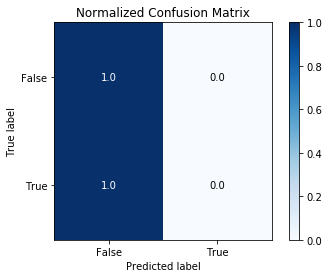

In [124]:
import matplotlib.pyplot as plt
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(df["actual"], df["predicted"], normalize=True )
plt.show()

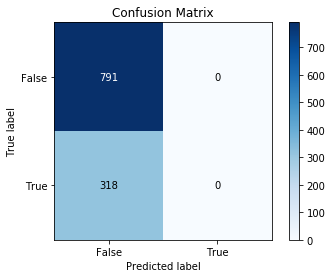

In [125]:
import matplotlib.pyplot as plt
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(df["actual"], df["predicted"], normalize=False )
plt.show()

deubiquitination
methylation
phosphorylation
ubiquitination
dephosphorylation
demethylation
acetylation


/Users/aeg/miniconda/envs/untitled2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


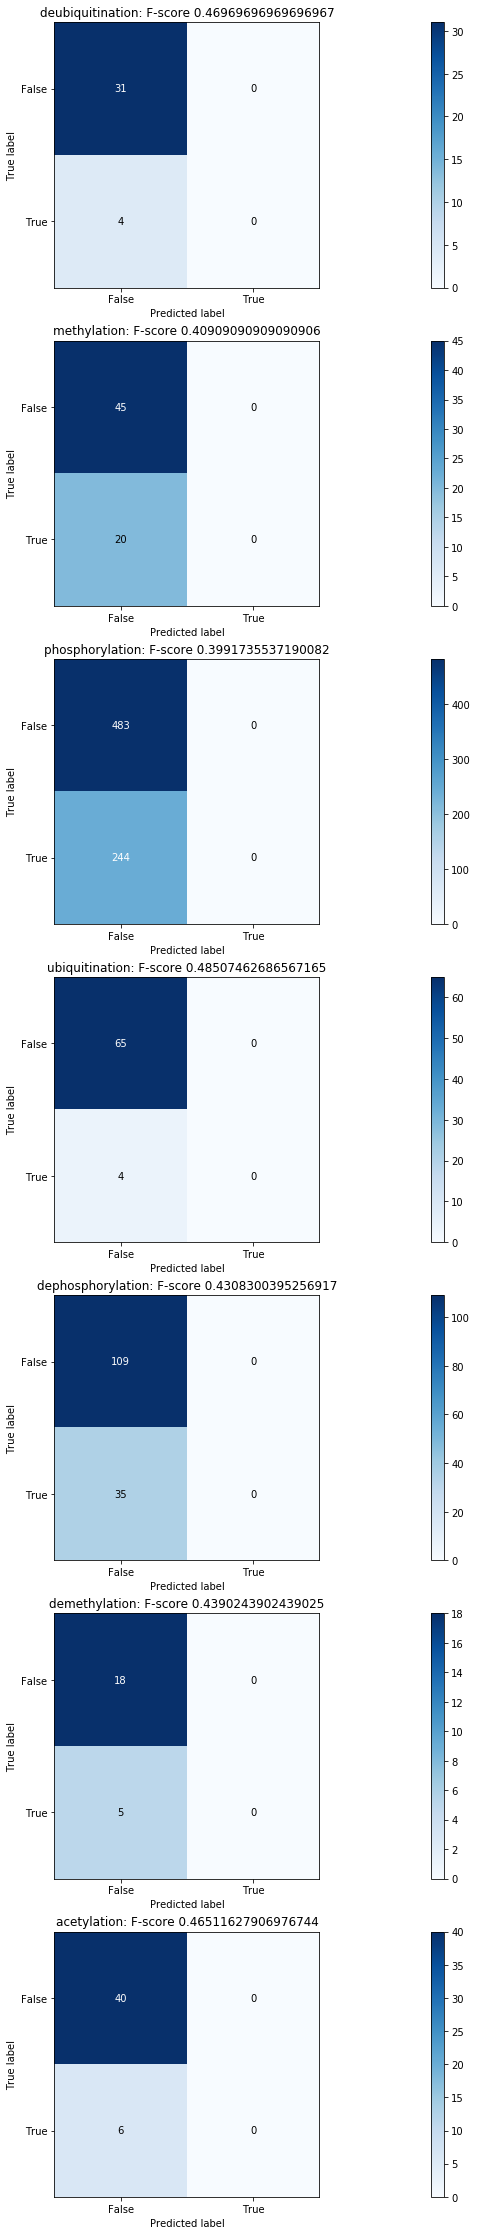

In [126]:
interactions = df["interactionType"].unique()
#fig, ax = plt.subplots(1, len(interactions), figsize=(40,40), squeeze=False, sharey=True, sharex=True)
fig = plt.figure(figsize=(40,40))
gs = fig.add_gridspec(7, 1)
#ax = fig.add_axes([0,0,1,1])
i = 0
for interaction in interactions:
    print(interaction)
    df_interaction_type = df.query("interactionType == '{}'".format(interaction))
    ax1 = fig.add_subplot(gs[i, 0])
    


    f1 = f1_score(df_interaction_type["actual"], df_interaction_type["predicted"], average='macro')  
    accuracy = accuracy_score(df_interaction_type["actual"], df_interaction_type["predicted"], sample_weight=None)
    skplt.metrics.plot_confusion_matrix(df_interaction_type["actual"], df_interaction_type["predicted"], normalize=False, title = "{}: F-score {}".format(interaction,f1), ax= ax1)
    
#     ax2 = fig.add_subplot(gs[i, 1])
#     skplt.metrics.plot_confusion_matrix(df_interaction_type["actual"], df_interaction_type["predicted"], normalize=False, title = "{}: F-score {}".format(interaction,f1), ax= ax2)


    i += 1
    #break

plt.savefig("confusionmatrix_.jpg", bbox_inches='tight')
plt.show()
    
    


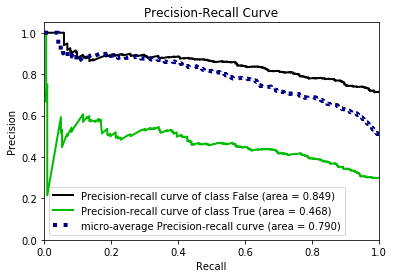

In [127]:
import matplotlib.pyplot as plt
import scikitplot as skplt

skplt.metrics.plot_precision_recall(df["actual"], df[["false", "true"]])

## Training / Validation epoch fit

In [128]:
import json
import pandas as pd
from pandas.io.json import json_normalize

def load_as_df (file):
    with open(file, "r") as i:
        data = json.loads(i.read())
        
    return json_normalize(data)
    

In [129]:
df_train_fit = load_as_df(train_fit_file)
df_train_fit.sort_values(["score.f-score"], ascending=False).head(n=10)

,epoch,score.accuracy,score.f-score,score.precision,score.recall
46,46,0.923397,0.860335,0.857597,0.863090
47,47,0.922740,0.857948,0.862460,0.853483
49,49,0.921646,0.856800,0.856115,0.857486
45,45,0.920333,0.851550,0.867830,0.835869
48,48,0.919019,0.851406,0.854150,0.848679
43,43,0.916174,0.845502,0.852033,0.839071
39,39,0.914642,0.842361,0.850612,0.834267
42,42,0.911797,0.837303,0.844463,0.830264
41,41,0.910703,0.835351,0.842148,0.828663
44,44,0.911140,0.833607,0.853904,0.814251


In [130]:
df_val_fit = load_as_df(validation_fit_file)
df_val_fit.sort_values(["score.precision"], ascending=False).head(n=10)

,epoch,score.accuracy,score.f-score,score.precision,score.recall
5,5,0.681941,0.484716,0.428571,0.557789
2,2,0.664420,0.522073,0.422360,0.683417
10,10,0.632075,0.523560,0.401070,0.753769
3,3,0.637466,0.500928,0.397059,0.678392
6,6,0.618598,0.532231,0.396552,0.809045
7,7,0.609164,0.530744,0.391408,0.824121
13,13,0.592992,0.512903,0.377672,0.798995
8,8,0.582210,0.512579,0.372998,0.819095
9,9,0.575472,0.517611,0.372247,0.849246
20,20,0.570081,0.517398,0.370130,0.859296


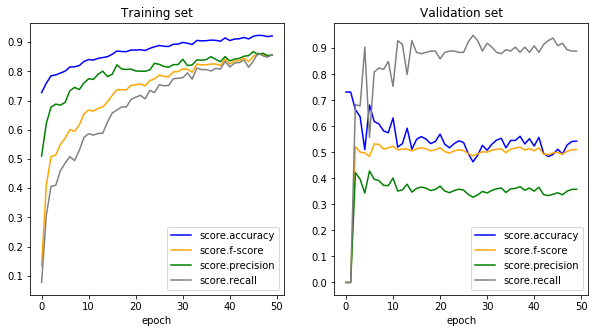

In [131]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

df_train_fit.plot.line(x="epoch", y="score.accuracy", ax = ax[0], color ="blue")
df_train_fit.plot.line(x="epoch", y="score.f-score", ax = ax[0], color="orange")
df_train_fit.plot.line(x="epoch", y="score.precision", ax = ax[0], color ="green")
df_train_fit.plot.line(x="epoch", y="score.recall", ax = ax[0], color ="gray")
ax[0].set_title("Training set")
ax[0].yaxis.set_major_locator(plt.FixedLocator([0,.1,.2,.3,.4,.5,.6, .7,.8,.9,1]))

df_val_fit.plot.line(x="epoch", y="score.accuracy", ax = ax[1], color="blue")
df_val_fit.plot.line(x="epoch", y="score.f-score", ax = ax[1], color ="orange")
df_val_fit.plot.line(x="epoch", y="score.precision", ax = ax[1], color ="green")
df_val_fit.plot.line(x="epoch", y="score.recall", ax = ax[1], color ="gray")
ax[1].set_title("Validation set")
ax[1].yaxis.set_major_locator(plt.FixedLocator([0,.1,.2,.3,.4,.5,.6, .7,.8,.9,1]))



plt.show()